In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import pickle
import os
import sys

In [76]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Subset
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [77]:
from lared_laughter.accel.dataset import AccelLaughterDataset, Subsample
from lared_laughter.constants import dataset_path

In [78]:
examples = pd.read_csv('../dataset/computational_examples.csv')
examples = examples[examples['condition'] == 'video']
accel_ds_path = os.path.join(dataset_path, 'accel_long.pkl')
annot_path = os.path.join(dataset_path, 'continuous.pkl')
example_ds = AccelLaughterDataset(examples, accel_ds_path, annot_path)

loaded 672 examples
467 have accel
447 have annotations


In [79]:
def plot_sample(sample):
    plt.plot(sample[0][:,0])
    plt.plot(sample[0][:,1])
    plt.plot(sample[0][:,2])

    plt.plot(np.arange(0, len(sample[1])*20/29.97, 20/29.97), sample[1])

[122]


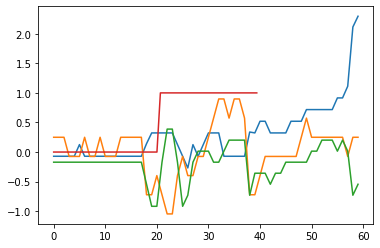

In [80]:
plot_sample(ds[188])

In [81]:
ds = AccelLaughterDataset(examples, accel_ds_path, annot_path, transform=Subsample(60, 60))

loaded 672 examples
467 have accel
447 have annotations


In [82]:
def plot_window(sample):
    plt.plot(sample[0][:,0])
    plt.plot(sample[0][:,1])
    plt.plot(sample[0][:,2])

    plt.plot(sample[1])

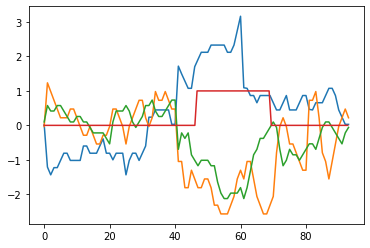

In [83]:
plot_sample(example_ds[67])

[70]


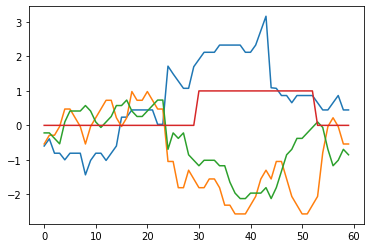

In [84]:
plot_window(ds[67])

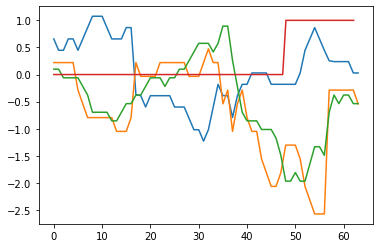

In [99]:
plot_sample(example_ds[433])

In [102]:
ds[111]

(tensor([[ 0.6569, -0.0332, -0.0601],
         [ 0.6569, -0.0332, -0.0601],
         [ 0.6569, -0.0332, -0.2190],
         [ 0.6569, -0.0332, -0.2190],
         [ 0.6569, -0.0332, -0.2190],
         [ 0.6569, -0.5408, -0.2190],
         [ 0.8662, -0.0332, -0.0601],
         [ 1.0755,  0.4743, -0.0601],
         [ 1.4940,  0.4743, -0.2190],
         [ 1.4940,  0.4743, -0.3779],
         [ 1.2847,  0.2205, -0.2190],
         [ 1.0755,  0.2205,  0.0988],
         [ 1.0755,  0.2205,  0.0988],
         [ 0.8662,  0.4743,  0.0988],
         [ 0.8662,  0.2205, -0.0601],
         [ 1.3011, -0.0332, -0.5362],
         [ 1.0755, -0.0332, -0.0601],
         [ 0.4477, -0.0332, -0.0601],
         [ 0.2384,  0.2205,  0.0988],
         [ 0.0292,  0.2205, -0.2190],
         [ 0.0292,  0.2205, -0.2190],
         [ 0.2384, -0.0332, -0.3779],
         [ 0.4477, -0.2870, -0.3779],
         [ 0.6569, -0.2870, -0.3779],
         [ 0.8662, -0.0332, -0.3779],
         [ 1.0755, -0.0332, -0.3779],
         [ 1

In [123]:
for i in range(len(ds)):
    print(ds[i][0].shape)

torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
torch.Size([60, 3])
